In [61]:
# Carga de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import sklearn.preprocessing as skpp



# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/mtcars.csv")

In [62]:
df.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


<Axes: xlabel='wt', ylabel='mpg'>

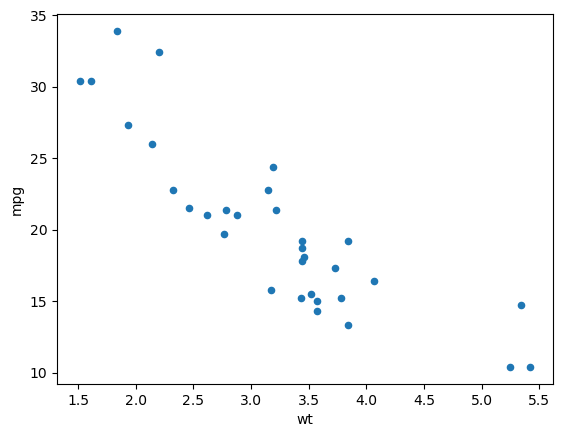

In [63]:
df.plot.scatter(x='wt', y='mpg')

c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

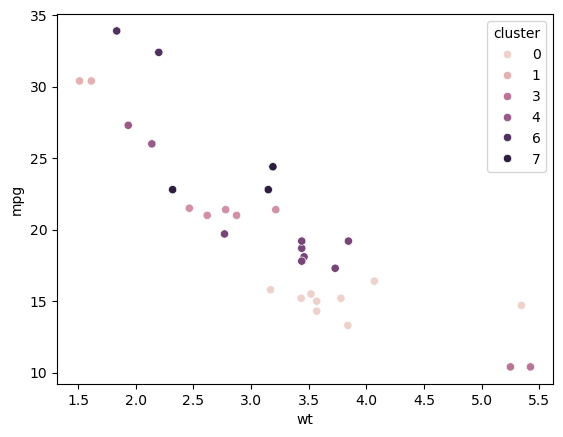

In [64]:
#foi aplicado o kmeans para identificar os clusters

k = KMeans(n_clusters=8, random_state=2).fit(df[['wt', 'mpg']]) #n_clusters é o número de clusters que queremos identificar
df['cluster'] = k.predict(df[['wt', 'mpg']]) #adiciona a coluna cluster ao dataframe

#plotar os clusters
sns.scatterplot(data=df, x='wt', y='mpg', hue='cluster', ) #hue é a coluna que define a cor dos pontos, no caso, a coluna cluster, que foi criada pelo kmeans 



<Axes: xlabel='wt', ylabel='Count'>

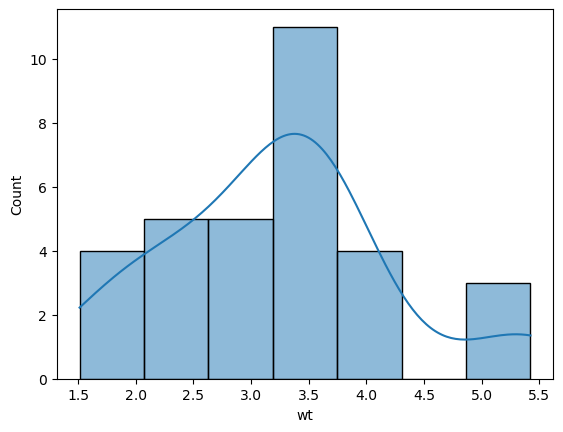

In [65]:
#identificar se existe uma distribuição normal
sns.histplot(df['wt'], kde=True)


In [66]:
#verificando correlacao linear
df[['wt', 'mpg']].corr()
#exibindo grafico de correlacao via pandas
df[['wt', 'mpg']].corr().style.background_gradient(cmap='coolwarm')

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


In [67]:
#aplicando a transformação logaritmica

df['wt_log'] = np.log(df['wt'])
df[['wt_log', 'mpg']].corr().style.background_gradient(cmap='coolwarm')

,wt_log,mpg
wt_log,1.000000,-0.900081
mpg,-0.900081,1.000000


<Axes: xlabel='wt_log', ylabel='mpg'>

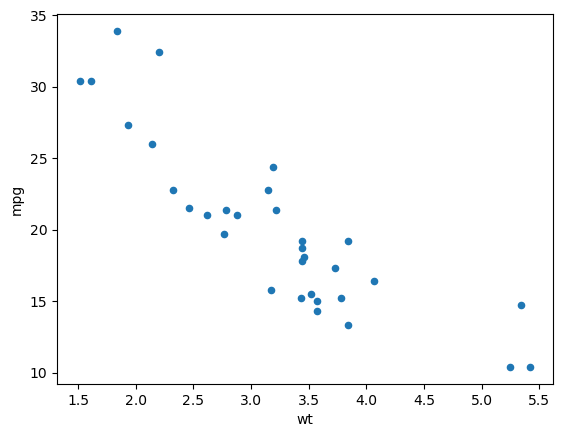

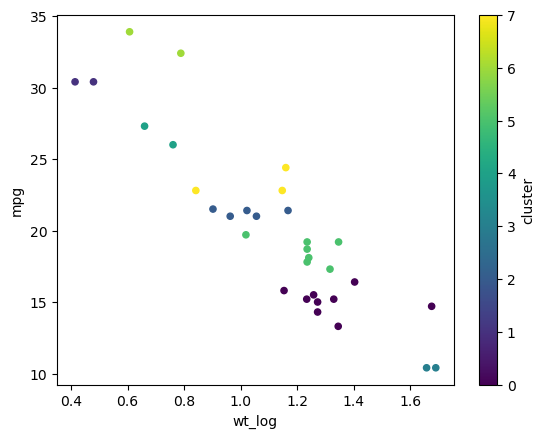

In [68]:
#pltaando o grafico de dispersao com a transformacao logaritmica e os dados antigos separando por cores 
df.plot.scatter(x='wt', y='mpg')
df.plot.scatter(x='wt_log', y='mpg', c='cluster', colormap='viridis')

In [87]:
#sepasrando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=1)

#criando o modelo de regressao linear
mod = LinearRegression().fit(X_treino, y_treino)

#R2
mod.score(X_teste, y_teste)


0.705474164043128

In [90]:
#verificando coeficientes
print('Intercepto = b')
print(mod.intercept_)
print('Coeficiente angular = a')
print(mod.coef_)



Intercepto = b
35.169348648012814
Coeficiente angular = m
[-4.66864362]


In [92]:
#validando calculo do coeficiente angular
# mpg = wt*a + b

mpf_prev = (-4.66*1.513) + 35.16 #1.513 é o valor de wt oriundo da base de teste
mpf_prev


28.109419999999997

In [96]:
y_prev[0]

28.105690847472793

In [88]:
# previsao em teste
y_prev = mod.predict(X_teste) #previsão do modelo
print(y_prev, y_teste)  #comparação entre a previsão e o real


[28.10569085 20.1596594  19.13255781 27.6294892  17.24175714 24.89833268
 18.7357231  20.36974837] 27    30.4
3     21.4
22    15.2
18    30.4
23    13.3
17    32.4
21    15.5
28    15.8
Name: mpg, dtype: float64


In [89]:
# Erro de previsao
mean_squared_error(y_teste, y_prev)

16.638500787793586